In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Сгенерить выборку X,Y X\~R, Y\~X^3+rand, объем выборки - 1K. Трансформировать саму выборку в датафрейм размерности (1000,2)

In [ ]:
x = np.random.uniform(low= -100, high = 100, size = 1000)

In [ ]:
freq, bins = np.histogram(x)

In [ ]:
from numpy.ma.core import log2

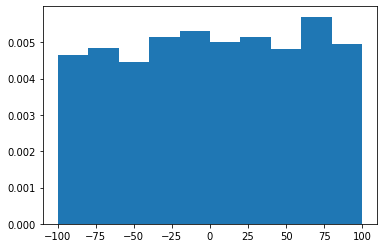

In [ ]:
plt.hist(x, bins = int(1+log2(len(x))), density=True)
None

In [ ]:
freq_cumul = []
curr_freq = 0
for f in freq:
  curr_freq += f
  freq_cumul.append(curr_freq)
freq_cumul = np.array(freq_cumul)/len(x)

In [ ]:
from scipy.stats import uniform

In [ ]:
uniform_theory = uniform(np.min(x), np.max(x)-np.min(x))

In [ ]:
# x_uni_th = np.linspace(uniform_theory.ppf(0.01),uniform_theory.ppf(0.99), 1000)
y_uni_th = uniform_theory.cdf(bins[:-1])

In [ ]:
plt.hist(x, cumulative=True, density=True, alpha = 0.8)
plt.plot(bins[:-1], freq_cumul, c='r')
plt.plot(bins[:-1], y_uni_th, c='magenta')

In [ ]:
err = np.random.normal(scale = 1000, size = len(x))

In [ ]:
y = x**3 + err

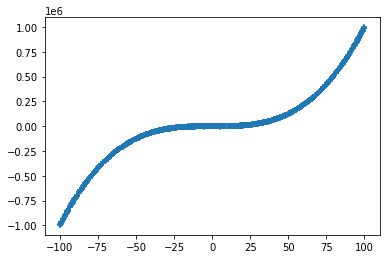

In [ ]:
# plt.figure(figsize=(15,10), dpi=40)
plt.scatter(x,y, marker='+')

In [ ]:
df = pd.DataFrame(data={'x': x, 'y':y})
df

x              y
0   -54.557500 -161521.082247
1    25.002909   16362.784288
2    63.742535  257036.114024
3   -83.169894 -574446.517954
4   -46.748739 -101771.672484
..         ...            ...
995 -69.986513 -342739.495871
996  89.247717  709064.476554
997  -6.910764   -1254.768816
998 -40.020458  -64711.498583
999 -44.153057  -87516.542732

[1000 rows x 2 columns]

In [ ]:
pd.pivot_table(df, index=['x'], values=['y'], aggfunc=lambda x: len(x))

y
x            
-99.854376  1
-99.805554  1
-99.604408  1
-99.551784  1
-99.169381  1
...        ..
 99.252942  1
 99.633119  1
 99.673625  1
 99.762225  1
 99.956053  1

[1000 rows x 1 columns]

тепловая карта seaborn, скрипичный график violin plot in sns, определить функцию и определить степень (сравнить линии, как до этого, подставляя разные полиномы)

In [ ]:
pd_for_pivot_t = pd.DataFrame(df.groupby(['x','y'])['y'].count()).rename({'y': 'amount'}, axis=1).reset_index()
pivot_t = pd.pivot_table(data=pd_for_pivot_t,index=['y'],columns=['x'],values='amount',fill_value=0)

x              y  amount
0   -99.854376 -994402.658175       1
1   -99.805554 -994730.425578       1
2   -99.604408 -985848.386650       1
3   -99.551784 -986244.146287       1
4   -99.169381 -975322.693879       1
..         ...            ...     ...
995  99.252942  978116.732384       1
996  99.633119  989147.060222       1
997  99.673625  990812.980374       1
998  99.762225  994125.189581       1
999  99.956053  997986.999536       1

[1000 rows x 3 columns]

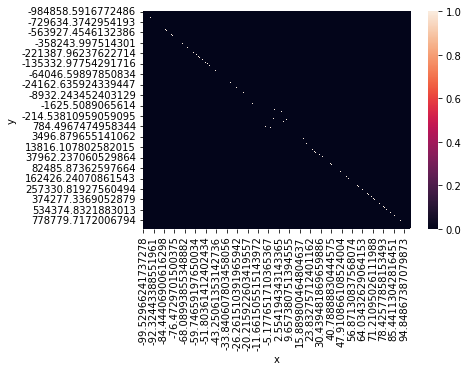

In [ ]:
ax = sns.heatmap(pivot_t)

In [ ]:
plt.hist(y, bins = 15)

(array([ 23.,  29.,  32.,  32.,  38.,  50.,  92., 411.,  85.,  56.,  43.,
         38.,  25.,  24.,  22.]),
 array([-984858.59167725, -852671.58896707, -720484.5862569 ,
        -588297.58354672, -456110.58083655, -323923.57812637,
        -191736.5754162 ,  -59549.57270603,   72637.43000415,
         204824.43271432,  337011.4354245 ,  469198.43813467,
         601385.44084485,  733572.44355502,  865759.4462652 ,
         997946.44897537]),
 <a list of 15 Patch objects>)

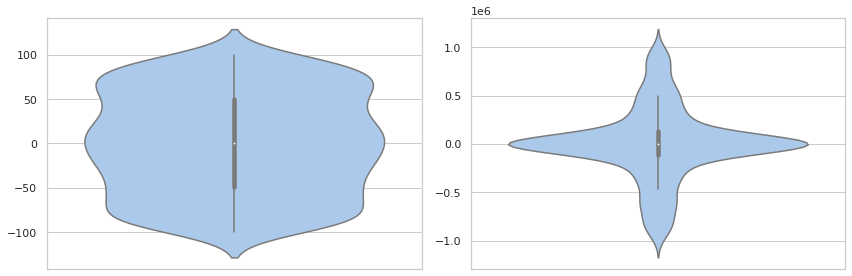

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.violinplot(y=x, ax=axs[0])
sns.violinplot(y=y, ax=axs[1])
f.tight_layout()

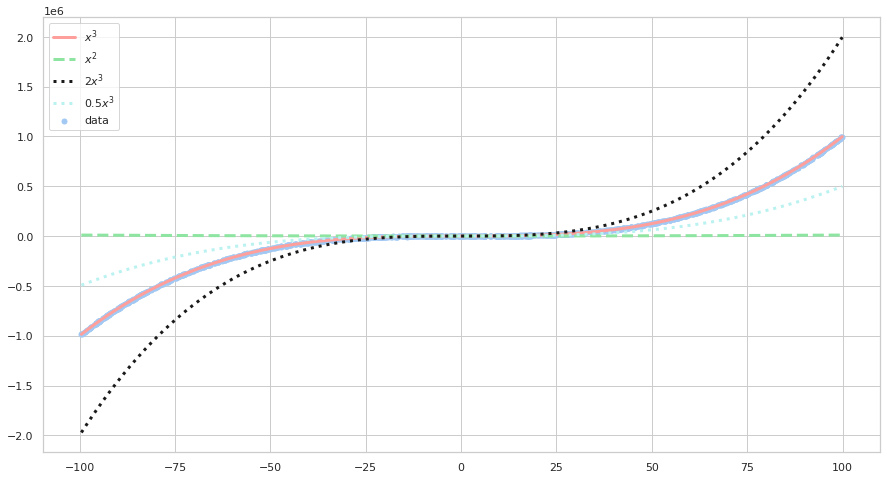

In [ ]:
plt.figure(figsize=(15,8))
x_sorted = np.array(sorted(x))
plt.plot(x_sorted, x_sorted**3, 'r-', lw=3, label='$x^3$')
plt.plot(x_sorted, x_sorted**2, 'g--', lw=3, label='$x^2$')
plt.plot(x_sorted, 2*x_sorted**3, 'k:', lw=3, label='$2x^3$')
plt.plot(x_sorted, 0.5*x_sorted**3, 'c:', lw=3, label='$0.5x^3$')
plt.scatter(x,y, marker='.', label='data', s=100)

plt.legend()